<a href="https://colab.research.google.com/github/pmecwan/MAT-421/blob/main/Module_F_Section_20_1%2C_20_2%2C_20_3%2C_20_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Differentiation Problem Statement



A numerical grid is an evenly spaced set of points over the domain of a function within a given interval, where the distance between adjacent points is called the spacing or step size. Python can be used to generate and represent functions on such grids, enabling discrete approximations that are useful for numerical calculations in engineering and scientific research.

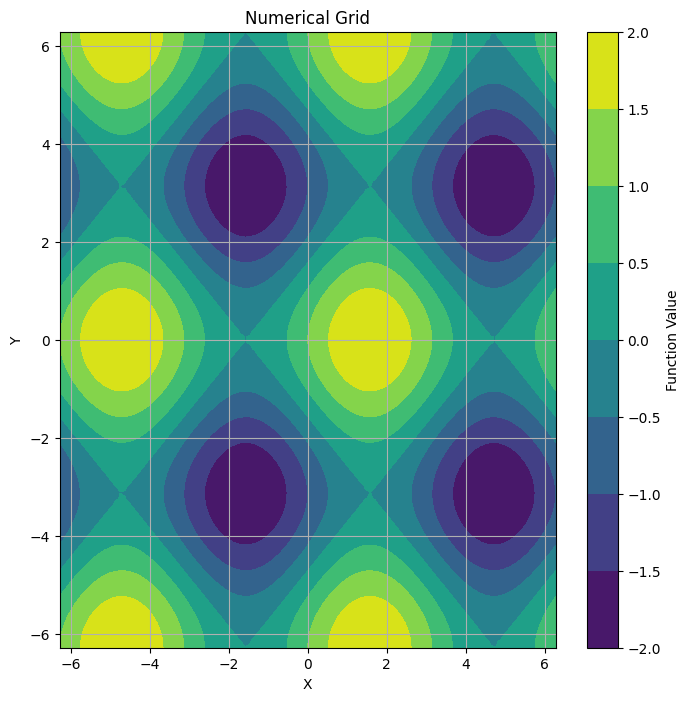

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y):
    x = np.linspace(x_start, x_end, num_points_x)
    y = np.linspace(y_start, y_end, num_points_y)
    X, Y = np.meshgrid(x, y)
    return X, Y

x_start, x_end = -2*np.pi, 2*np.pi
y_start, y_end = -2*np.pi, 2*np.pi
num_points_x, num_points_y = 100, 100
X, Y = generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y)

Z = np.sin(X) + np.cos(Y)

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Numerical Grid')
plt.grid(True)
plt.show()

Finite Difference Approximating Derivatives



The derivative of a function at a point represents the slope of the function at that point, which can be approximated using nearby function values in finite difference methods. The forward difference estimates the slope. These approximations can also be derived and validated using Taylor series expansions.

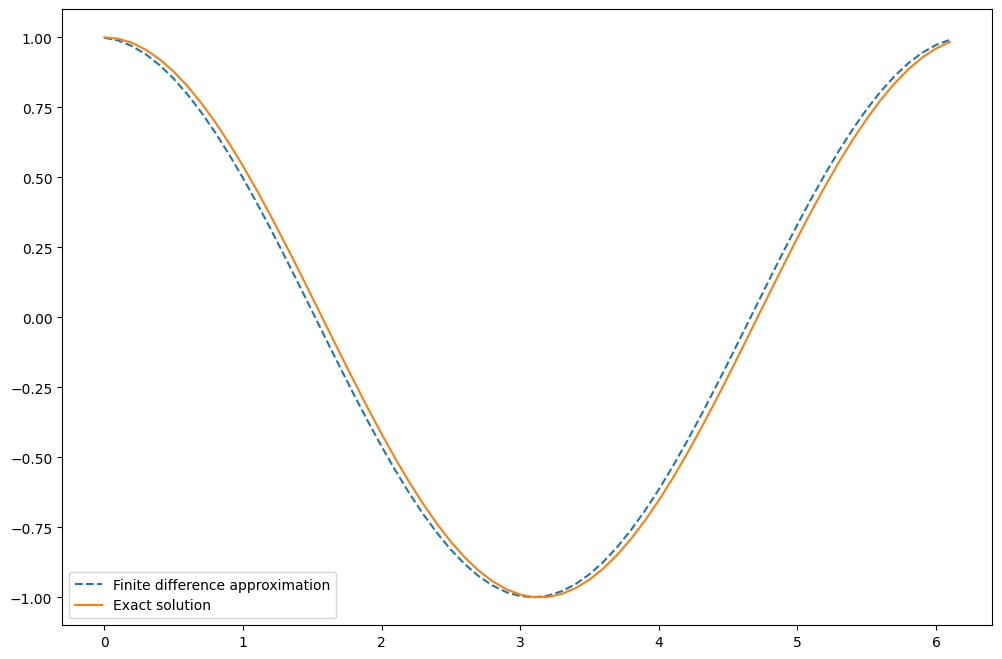

0.04997515074549317


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)


forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = np.cos(x_diff)

plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

max_error = max(abs(exact_solution - forward_diff))
print(max_error)

Approximating of Higher Order Derivatives



When approximating higher-order derivatives, we can take the Taylor series  and compute it.

-x**3/6 + x

Taylor expansion shows ok behavior near the 0


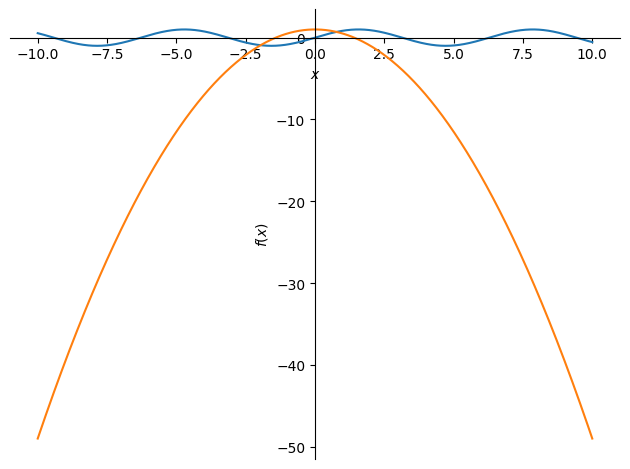

In [19]:
import numpy as np
import matplotlib.pyplot as plt
!pip install sympy
import sympy
import numpy as np
from sympy.plotting import plot
from sympy import *
x = sympy.Symbol('x')

eq=sin(x)

taylorExpand = eq.series(x, 0, 5).removeO()
display(taylorExpand)



p1 = plot(eq, show=False)
p2 = plot(diff(taylorExpand), show=False)
p1.append(p2[0])
print('Taylor expansion shows ok behavior near the 0')
p1.show()

20.4 - Numerical Differentiation with Noise

Data can be contaminated with noise, causing its value to deviate slightly from what it would be if computed purely through mathematical calculations. This noise often arises from inaccuracies in measurement devices, external perturbations, or other factors outside the system of interest. While its impact can sometimes be small, it may also be significant, potentially rendering approximations unusable depending on the application.

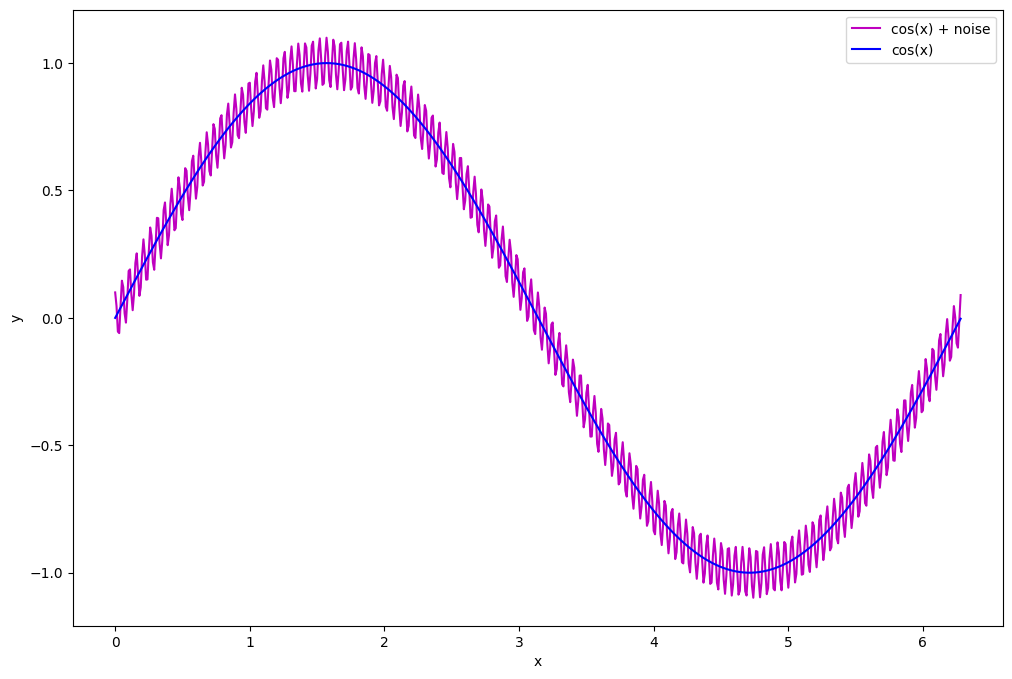

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)

omega = 120
epsilon = 0.1

y = np.sin(x)
y_noise = y + epsilon*np.cos(omega*x)

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'm-', label = 'cos(x) + noise')
plt.plot(x, y, 'b-', label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()